In [1]:
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt 

C:\Users\strat\ProgramData\Lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


### Device config


In [2]:
device = torch.device( 'cpu')

### Constants


In [3]:
INPUT_SIZE = 784
HIDDEN_SIZE = 100
NUM_CLASSES = 10
NUM_EPOCHS = 2
BATCH_SIZE = 100
LR = 1e-3

### MNIST

In [4]:
train_dataset = torchvision.datasets.MNIST(
                                        root = "./data",
                                        train = True,
                                        transform=transforms.ToTensor(),
                                        download=True
                                          )

In [5]:
test_dataset = torchvision.datasets.MNIST(
                               root = "./data",
                               train = False,
                               transform=transforms.ToTensor(),
                    
)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,shuffle=False)

In [7]:
ex = iter(train_loader)
x,y = next(ex)
x.shape,y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

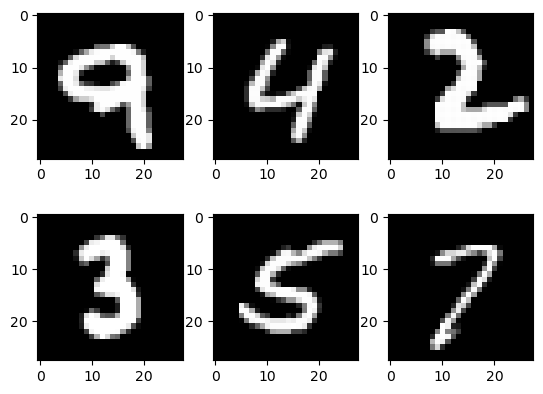

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x[i][0],cmap = "gray")
plt.show()

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork,self).__init__()
        self.l1 = nn.Linear(in_features=input_size,out_features=hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(in_features=hidden_size,out_features=num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
        
        

In [10]:
model = NeuralNetwork(INPUT_SIZE,HIDDEN_SIZE,NUM_CLASSES).to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),LR)

In [12]:
n_total_steps = len(train_loader)

In [13]:
for epoch in range(NUM_EPOCHS):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        labels_pred = model(images)
        loss = criterion(labels_pred,labels)

        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f"epoch {epoch+1} / {NUM_EPOCHS}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}")
        

epoch 1 / 2, step 100 / 600, loss = 0.3857
epoch 1 / 2, step 200 / 600, loss = 0.2486
epoch 1 / 2, step 300 / 600, loss = 0.3272
epoch 1 / 2, step 400 / 600, loss = 0.2714
epoch 1 / 2, step 500 / 600, loss = 0.2205
epoch 1 / 2, step 600 / 600, loss = 0.2611
epoch 2 / 2, step 100 / 600, loss = 0.1419
epoch 2 / 2, step 200 / 600, loss = 0.1019
epoch 2 / 2, step 300 / 600, loss = 0.1963
epoch 2 / 2, step 400 / 600, loss = 0.1062
epoch 2 / 2, step 500 / 600, loss = 0.3466
epoch 2 / 2, step 600 / 600, loss = 0.0893


In [15]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        labels_pred = model(images)
        _,pred = torch.max(labels_pred,1)

        n_samples +=labels.shape[0]
        n_correct = (pred == labels).sum().item()
    acc = 100 * n_correct/n_samples
    print(f"accuracy = {acc}")
        

accuracy = 0.95
